In [177]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.linear_model import LinearRegression
import numpy as np

file_path = r'C:\Users\xbarc\Downloads\Capstone project\SQL projects\ZHVI.csv'  # Note out the use of raw string for file path
df = pd.read_csv(file_path)

df_long = df.melt(id_vars=['Unnamed: 0'], var_name='State', value_name='Price')
df_long.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

print(df_long.head())

         Date     State          Price
0  2000-01-01  Virginia  122268.193859
1  2000-02-01  Virginia  122584.578966
2  2000-03-01  Virginia  122920.021448
3  2000-04-01  Virginia  123553.896176
4  2000-05-01  Virginia  124165.832795


In [179]:
df_long.shape

(15300, 3)

In [181]:
df_long.dtypes

Date      object
State     object
Price    float64
dtype: object

In [185]:
#Formatting of the date column to datetime
df_long['Date'] = pd.to_datetime(df_long['Date'])

#Round the Price column to 2 decimal places
df_long['Price'] = df_long['Price'].round(2)

print(df_long.head())

        Date     State      Price
0 2000-01-01  Virginia  122268.19
1 2000-02-01  Virginia  122584.58
2 2000-03-01  Virginia  122920.02
3 2000-04-01  Virginia  123553.90
4 2000-05-01  Virginia  124165.83


In [187]:
df_long.dtypes

Date     datetime64[ns]
State            object
Price           float64
dtype: object

In [190]:
#Filter data for 2024 and calculate the overall mean price
mean_2024_price = df_long[df_long['Date'].dt.year == 2024]['Price'].mean().round(2)
print("Overall Mean Housing Price for 2024:", mean_2024_price)

#Prepare data for prediction (linear regression)
#Extract year and mean price for each year
df_long['Year'] = df_long['Date'].dt.year
yearly_prices = df_long.groupby('Year')['Price'].mean().reset_index()

#Train a simple linear regression model
X = yearly_prices['Year'].values.reshape(-1, 1)
y = yearly_prices['Price'].values
model = LinearRegression()
model.fit(X, y)

#Predict the 2025 price
predicted_2025_price = model.predict(np.array([[2025]]))[0].round(2)
print("Predicted Housing Price for 2025:", predicted_2025_price)

Overall Mean Housing Price for 2024: 364488.72
Predicted Housing Price for 2025: 318130.45


In [114]:
#Basic Statistical Analysis
# Calculate summary statistics for house prices
summary_stats = df_long.groupby('State')['Price'].describe().round(2)

print("Summary Statistics by State:")
print(summary_stats)

Summary Statistics by State:
                          count       mean        std        min        25%  \
State                                                                         
Alabama                   300.0  141018.09   35304.74   97864.21  117810.38   
Alaska                    299.0  259310.04   60803.26  136697.94  226246.74   
Arizona                   299.0  233787.96   91061.32  133988.26  160099.94   
Arkansas                  300.0  130744.13   32009.04   86370.86  113949.90   
California                300.0  429766.77  158240.41  186449.09  299797.40   
Colorado                  300.0  301453.03  114002.30  174451.46  220979.39   
Connecticut               300.0  260616.18   52370.44  159708.39  232929.04   
Delaware                  300.0  246880.16   58218.63  144664.05  212221.40   
Florida                   300.0  207116.60   80420.99  105939.10  143758.81   
Georgia                   300.0  176304.09   59334.17  116345.64  138605.06   
Hawaii                 

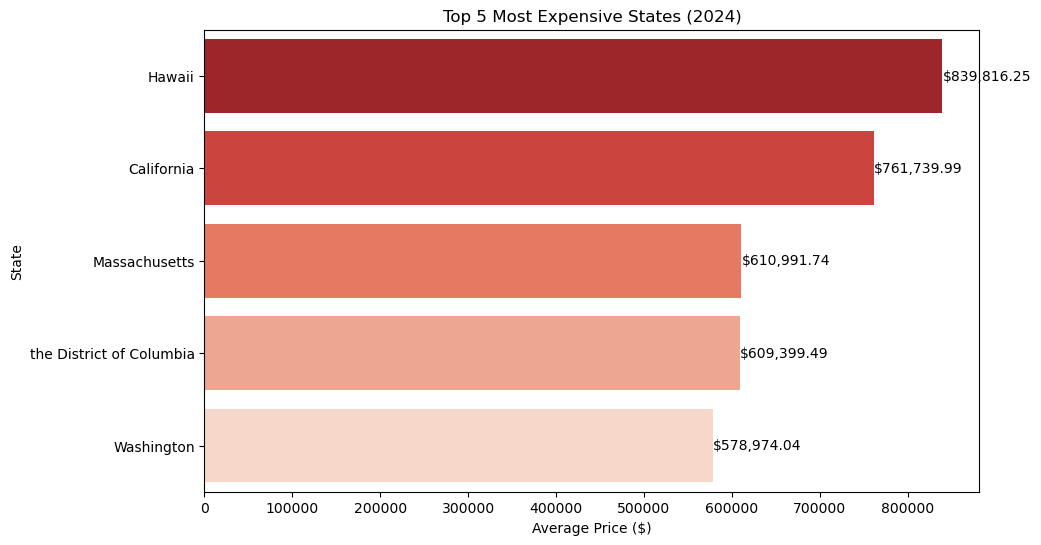

In [116]:
# Calculate the average price for each state by year and round to 2 decimals
state_year_avg = df_long.groupby(['Year', 'State'])['Price'].mean().reset_index()
state_year_avg['Price'] = state_year_avg['Price'].round(2)

# Calculate the overall average price by year and round to 2 decimals
yearly_avg = df_long.groupby('Year')['Price'].mean().reset_index()
yearly_avg['Price'] = yearly_avg['Price'].round(2)

# Calculate year-over-year percentage change for each state
state_year_avg_wide = state_year_avg.pivot(index='Year', columns='State', values='Price')
pct_change = state_year_avg_wide.pct_change() * 100

# Round the percentage change to 2 decimals
pct_change = pct_change.round(2)

# Calculate the year-over-year percentage change in average prices
yearly_avg['pct_change'] = yearly_avg['Price'].pct_change() * 100
yearly_avg['pct_change'] = yearly_avg['pct_change'].round(2)

# Find the top 5 most expensive states by average price in 2024
latest_prices = state_year_avg[state_year_avg['Year'] == 2024].sort_values('Price', ascending=False).head()
plt.figure(figsize=(10,6))
ax = sns.barplot(y=latest_prices['State'], x=latest_prices['Price'], hue=latest_prices['State'], palette="Reds_r", legend=False)


for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'${bar.get_width():,.2f}', 
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel("Average Price ($)")
plt.ylabel("State")
plt.title("Top 5 Most Expensive States (2024)")
plt.show()

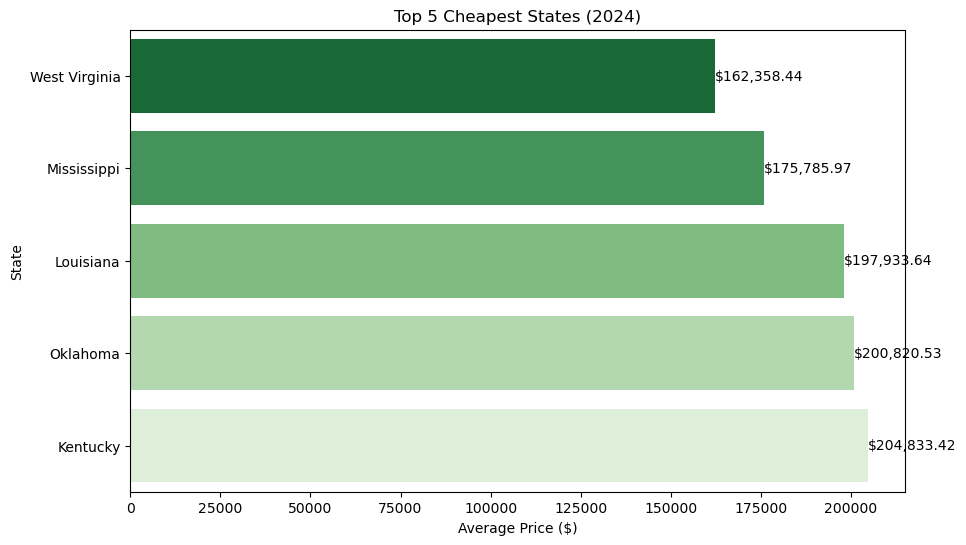

In [118]:
# Find the top 5 cheapest states by average price in 2024
cheapest_states = state_year_avg[state_year_avg['Year'] == 2024].sort_values('Price', ascending=True).head()
plt.figure(figsize=(10,6))
ax = sns.barplot(y=cheapest_states['State'], x=cheapest_states['Price'], hue=cheapest_states['State'], palette="Greens_r", legend=False)


for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'${bar.get_width():,.2f}', 
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel("Average Price ($)")
plt.ylabel("State")
plt.title("Top 5 Cheapest States (2024)")
plt.show()

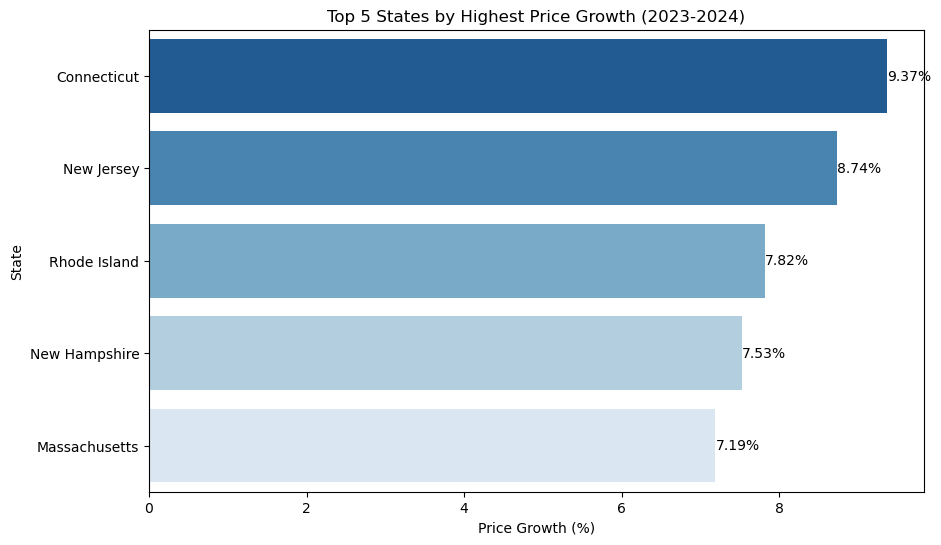

In [120]:
# Find the top 5 states with the highest price growth from 2023 to 2024
latest_growth = pct_change.iloc[-1].sort_values(ascending=False).head()
# Format growth output as percentages
latest_growth = latest_growth.apply(lambda x: f"{x:.2f}%")

growth_df = latest_growth.reset_index()
growth_df.columns = ['State', 'Growth (%)']
growth_df['Growth (%)'] = growth_df['Growth (%)'].str.replace('%', '').astype(float)  
plt.figure(figsize=(10,6))
ax = sns.barplot(y=growth_df['State'], x=growth_df['Growth (%)'], hue=growth_df['State'], palette="Blues_r", legend=False)

# Add data labels
for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.2f}%', 
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel("Price Growth (%)")
plt.ylabel("State")
plt.title("Top 5 States by Highest Price Growth (2023-2024)")
plt.show()

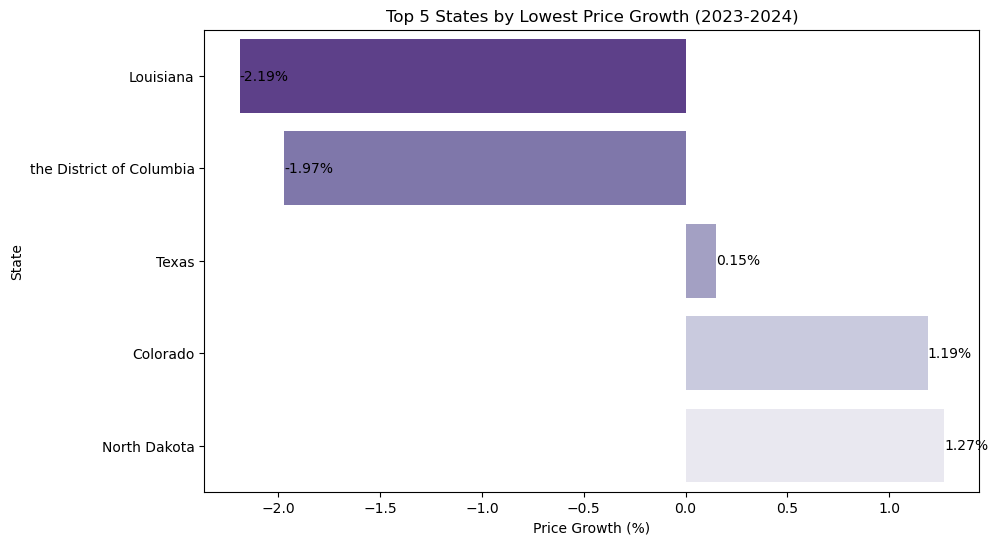

In [122]:
# Find the top 5 states with the lowest price growth from 2023 to 2024
# Convert index to column for plotting
lowest_growth = pct_change.iloc[-1].sort_values(ascending=True).head()
lowest_growth_df = lowest_growth.reset_index()
lowest_growth_df.columns = ['State', 'Growth (%)']
lowest_growth_df['Growth (%)'] = lowest_growth_df['Growth (%)'].astype(str)
lowest_growth_df['Growth (%)'] = lowest_growth_df['Growth (%)'].str.replace('%', '').astype(float)

lowest_growth = pct_change.iloc[-1].sort_values(ascending=True).head()
# Format growth output as percentages
lowest_growth = lowest_growth.apply(lambda x: f"{x:.2f}%")
plt.figure(figsize=(10,6))
ax = sns.barplot(y=lowest_growth_df['State'], x=lowest_growth_df['Growth (%)'], hue=lowest_growth_df['State'], palette="Purples_r", legend=False)

# Add data labels

for bar in ax.patches:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width():,.2f}%', 
             ha='left', va='center', fontsize=10, color='black')

plt.xlabel("Price Growth (%)")
plt.ylabel("State")
plt.title("Top 5 States by Lowest Price Growth (2023-2024)")
plt.show()

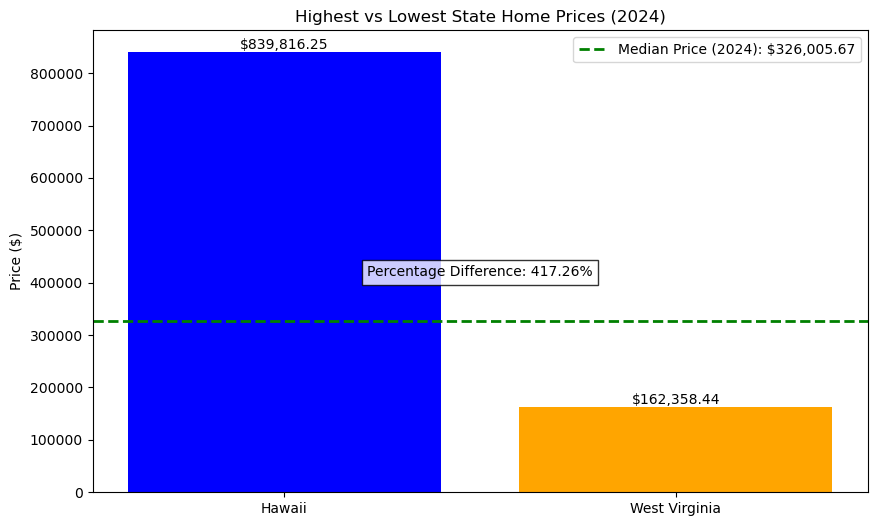

Highest State (Hawaii): $839,816.25
Lowest State (West Virginia): $162,358.44
Median Price (2024): $326,005.67
Percentage Difference: 417.26%


In [124]:
# Get 2024 data for highest and lowest priced states
prices_2024 = state_year_avg[state_year_avg['Year'] == 2024]
highest_state = prices_2024.nlargest(1, 'Price')
lowest_state = prices_2024.nsmallest(1, 'Price')

# Calculate percentage difference
pct_difference = ((highest_state['Price'].values[0] - lowest_state['Price'].values[0]) / 
                 lowest_state['Price'].values[0] * 100)

# Compute the median price for 2024 for all states
median_2024 = prices_2024['Price'].median()

# Create bar chart comparing highest and lowest state prices for 2024
plt.figure(figsize=(10, 6))
states = [highest_state['State'].values[0], lowest_state['State'].values[0]]
prices = [highest_state['Price'].values[0], lowest_state['Price'].values[0]]

bars = plt.bar(states, prices, color=['blue', 'orange'])
plt.title('Highest vs Lowest State Home Prices (2024)')
plt.ylabel('Price ($)')

# Add value labels on the bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'${height:,.2f}',
             ha='center', va='bottom')

# Add horizontal median line
plt.axhline(y=median_2024, color='green', linestyle='--', linewidth=2, label=f'Median Price (2024): ${median_2024:,.2f}')
plt.legend()

# Add percentage difference annotation in the middle
plt.text(0.5, max(prices)/2, 
         f'Percentage Difference: {pct_difference:.2f}%',
         ha='center', va='center',
         bbox=dict(facecolor='white', alpha=0.8))

plt.show()

# Print the exact values
print(f"\
Highest State ({highest_state['State'].values[0]}): ${highest_state['Price'].values[0]:,.2f}")
print(f"Lowest State ({lowest_state['State'].values[0]}): ${lowest_state['Price'].values[0]:,.2f}")
print(f"Median Price (2024): ${median_2024:,.2f}")
print(f"Percentage Difference: {pct_difference:.2f}%")

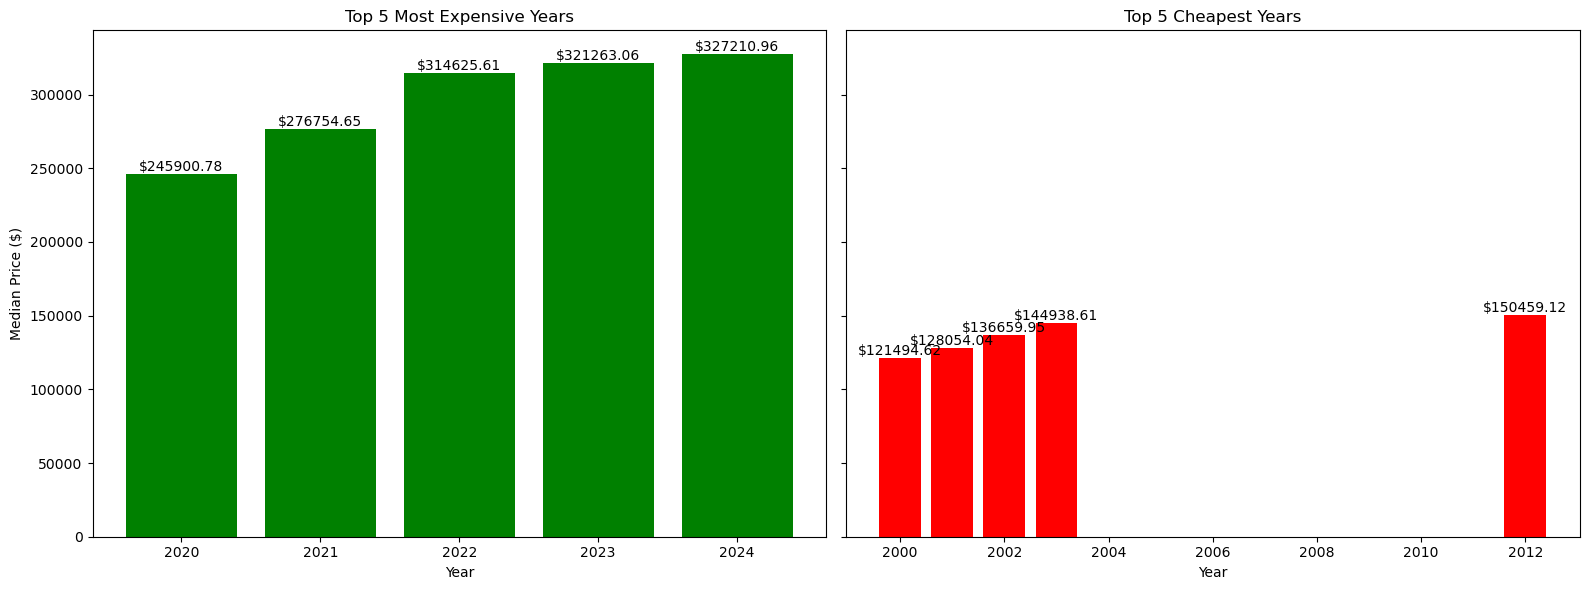

In [126]:
# Calculate the median price for each year across all states
yearly_median = df_long.groupby('Year')['Price'].median().reset_index()

# Find the 5 most expensive and 5 cheapest years
top_5_expensive_years = yearly_median.sort_values('Price', ascending=False).head(5)
top_5_cheapest_years = yearly_median.sort_values('Price', ascending=True).head(5)

# Plot the results as a two-column bar chart
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Plot most expensive years
axes[0].bar(top_5_expensive_years['Year'], top_5_expensive_years['Price'], color='green')
axes[0].set_title('Top 5 Most Expensive Years')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Median Price ($)')
for i, row in top_5_expensive_years.iterrows():
    axes[0].text(row['Year'], row['Price'], f"${row['Price']:.2f}", ha='center', va='bottom')

# Plot cheapest years
axes[1].bar(top_5_cheapest_years['Year'], top_5_cheapest_years['Price'], color='red')
axes[1].set_title('Top 5 Cheapest Years')
axes[1].set_xlabel('Year')
for i, row in top_5_cheapest_years.iterrows():
    axes[1].text(row['Year'], row['Price'], f"${row['Price']:.2f}", ha='center', va='bottom')

plt.tight_layout()
plt.show()

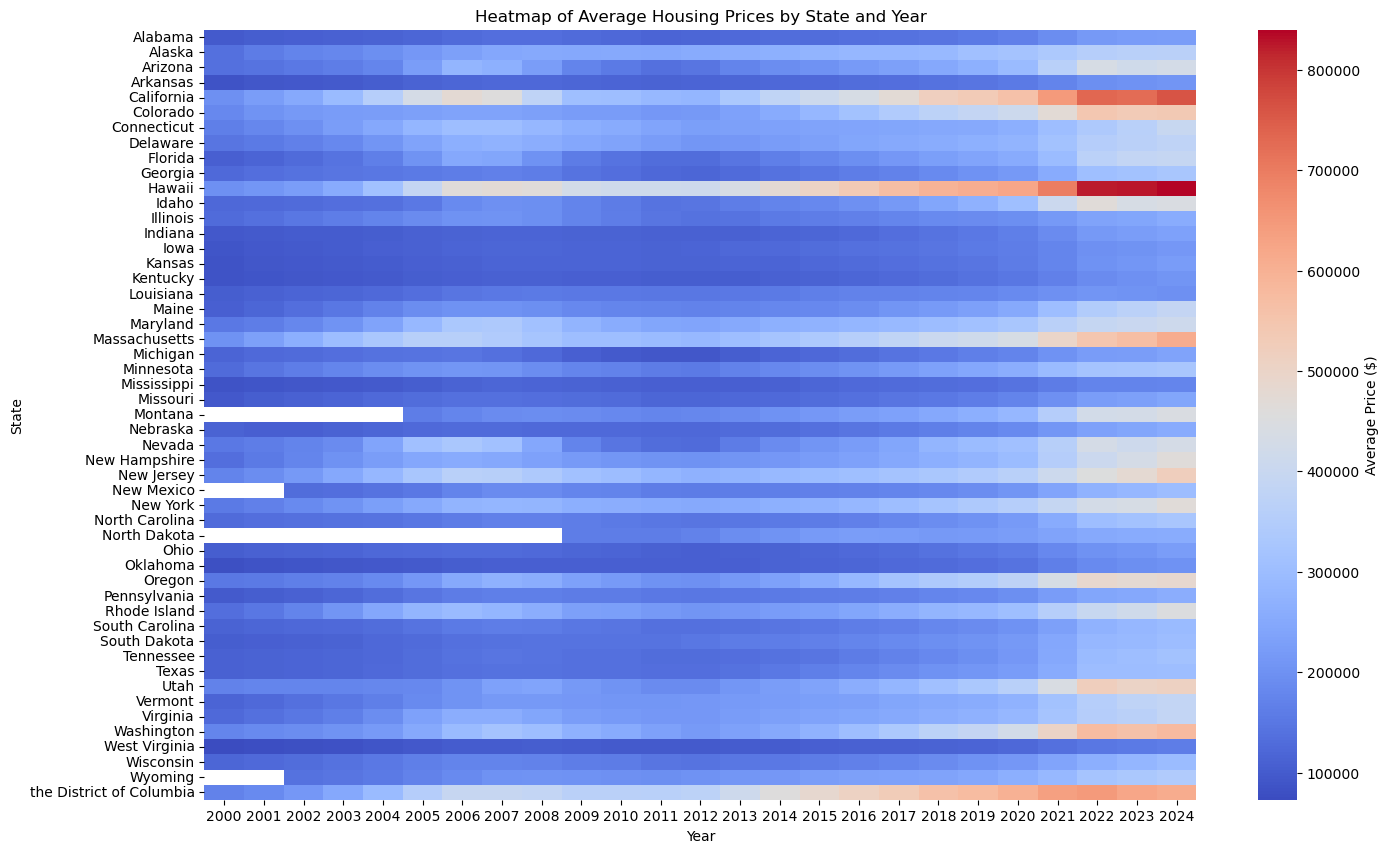

In [127]:
# Pivot the data to create a matrix of states (rows) vs years (columns)
heatmap_data = state_year_avg.pivot(index='State', columns='Year', values='Price')

# Plot the heatmap using seaborn
plt.figure(figsize=(16, 10))
sns.heatmap(heatmap_data, cmap='coolwarm', annot=False, fmt='.0f', cbar_kws={'label': 'Average Price ($)'})
plt.title('Heatmap of Average Housing Prices by State and Year')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

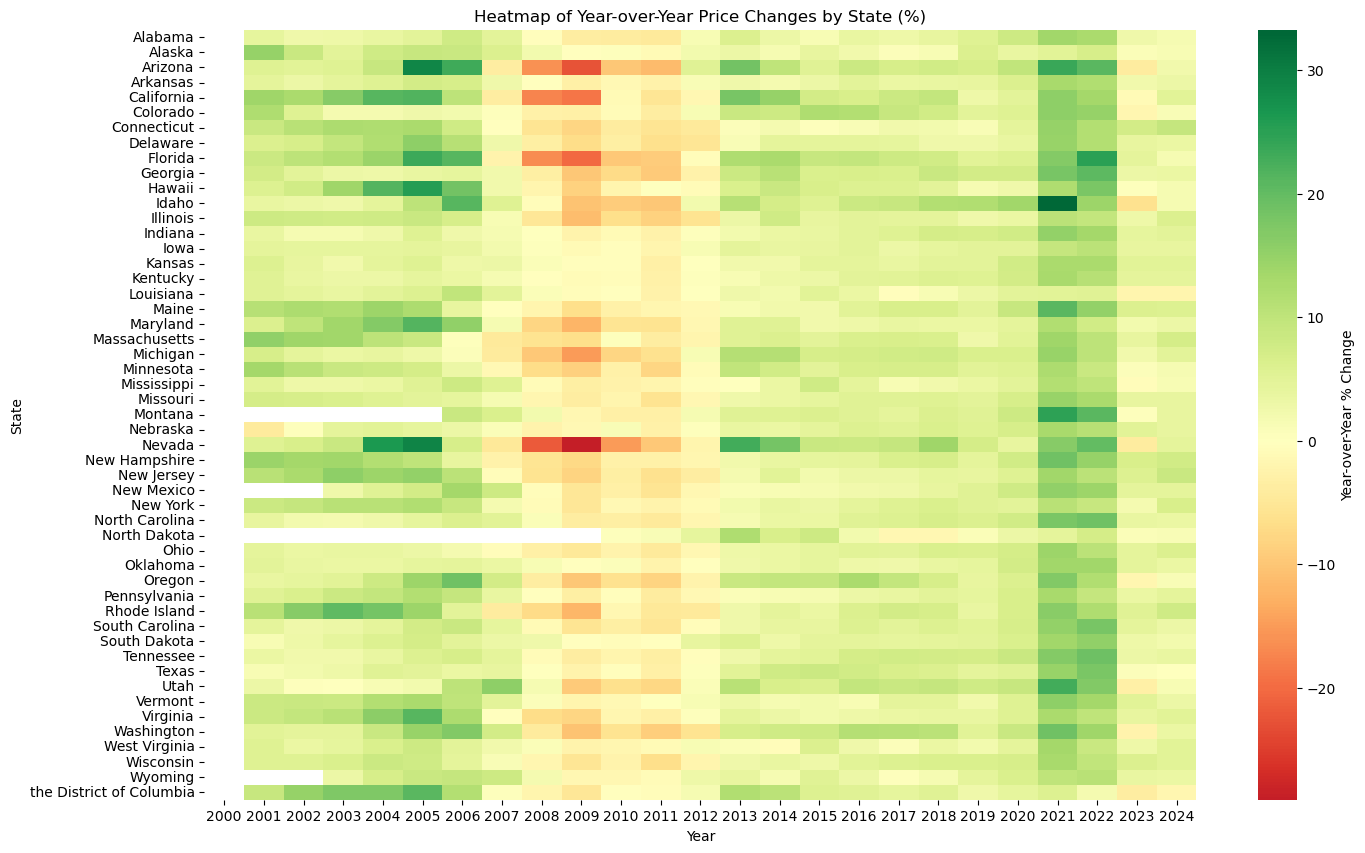

In [129]:
# Plot the heatmap of percentage changes
plt.figure(figsize=(16, 10))
sns.heatmap(pct_change.T, cmap='RdYlGn', center=0, annot=False, 
            cbar_kws={'label': 'Year-over-Year % Change'})
plt.title('Heatmap of Year-over-Year Price Changes by State (%)')
plt.xlabel('Year')
plt.ylabel('State')
plt.show()

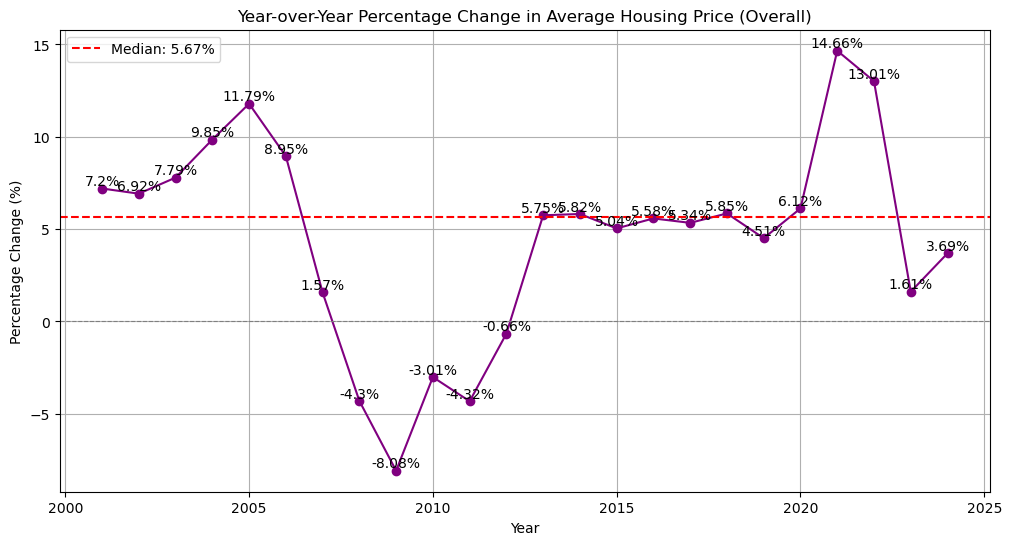

In [130]:
# Calculate the median of the year-over-year percentage changes
median_pct_change = yearly_avg['pct_change'].median()

# Plot the percentage change
plt.figure(figsize=(12, 6))
plt.plot(yearly_avg['Year'], yearly_avg['pct_change'], marker='o', linestyle='-', color='purple')
plt.axhline(median_pct_change, color='red', linestyle='--', linewidth=1.5, label=f'Median: {median_pct_change:.2f}%')
plt.title('Year-over-Year Percentage Change in Average Housing Price (Overall)')
plt.xlabel('Year')
plt.ylabel('Percentage Change (%)')
plt.axhline(0, color='grey', linewidth=0.8, linestyle='--')
plt.grid(True)

# Annotate data labels on the points
for i, row in yearly_avg.iterrows():
    if pd.notnull(row['pct_change']):
        plt.text(row['Year'], row['pct_change'], str(round(row['pct_change'], 2)) + '%', ha='center', va='bottom')

plt.legend()
plt.show()

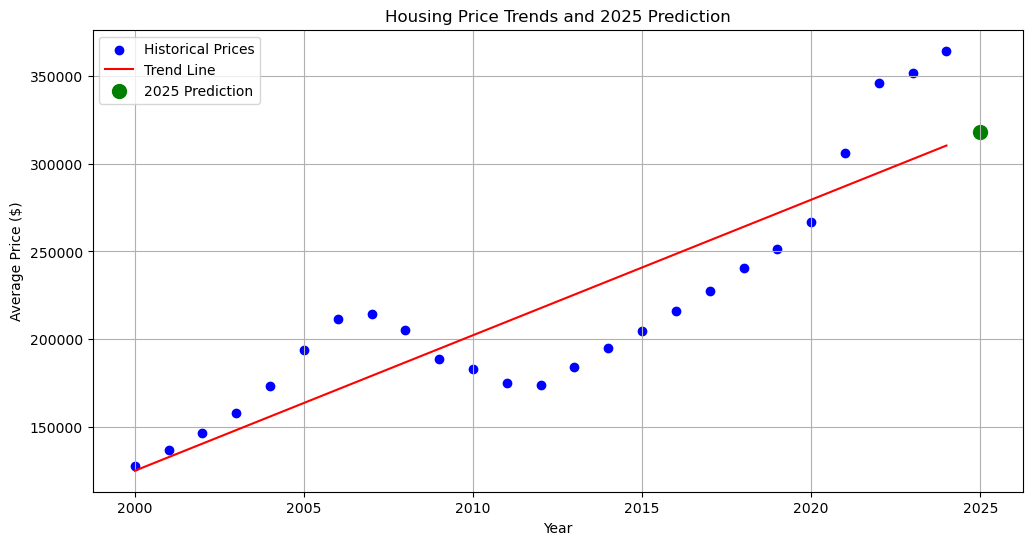

Predicted percentage change from 2024 to 2025: -12.72%
Predicted Housing Price for 2025: 318130.45


In [153]:
# Visualize the historical prices and prediction
plt.figure(figsize=(12, 6))
plt.scatter(yearly_prices['Year'], yearly_prices['Price'], color='blue', label='Historical Prices')
plt.plot(yearly_prices['Year'], model.predict(X), color='red', label='Trend Line')

# Add the 2025 prediction point
plt.scatter(2025, predicted_2025_price, color='green', s=100, label='2025 Prediction')

plt.title('Housing Price Trends and 2025 Prediction')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the percentage change from 2024 to 2025
percent_change = ((predicted_2025_price - mean_2024_price) / mean_2024_price) * 100
print(f"Predicted percentage change from 2024 to 2025: {percent_change:.2f}%")

predicted_2025_price = model.predict(np.array([[2025]]))[0].round(2)
print("Predicted Housing Price for 2025:", predicted_2025_price)

2024 Average Price: 364488.72
Mean Growth: 9863.75
Standard Deviation of Growth: 12890.25
Predicted 2025 Price (using mean growth + std growth): 387242.72


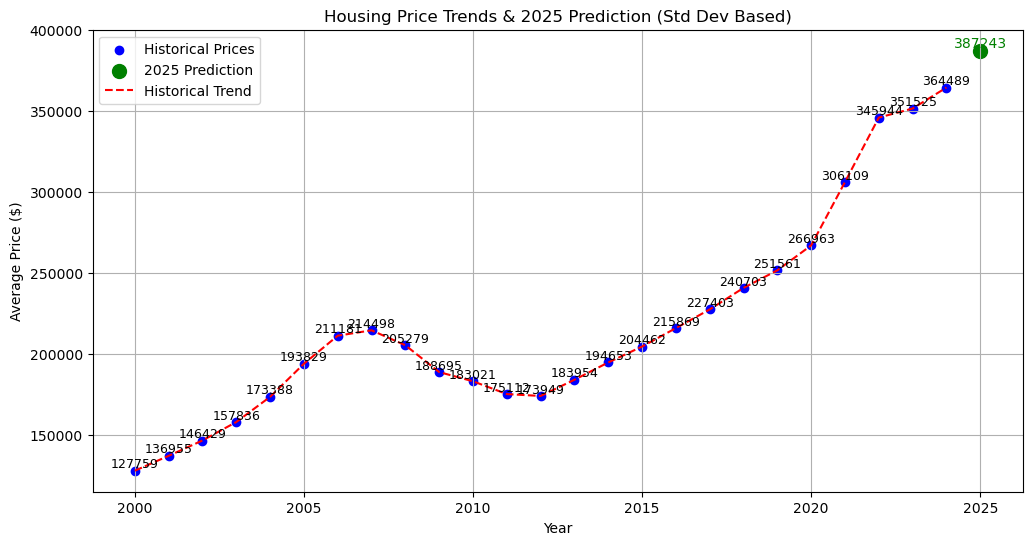

Predicted percentage change from 2024 to 2025: 6.24%


In [167]:
#Sort prices values
yearly_prices.sort_values('Year', inplace=True)

# Calculate year-to-year price differences
yearly_prices['Price_Diff'] = yearly_prices['Price'].diff()

# Calculate the mean and standard deviation of these differences (ignoring NaN)
mean_growth = yearly_prices['Price_Diff'].mean().round(2)
std_growth = round(yearly_prices['Price_Diff'].std(), 2)
# Get the 2024 average price
price_2024 = yearly_prices.loc[yearly_prices['Year'] == 2024, 'Price'].values.round(2)
if len(price_2024) > 0:
    price_2024 = price_2024[0]
else:
    raise ValueError('2024 price data not available')

# Predict 2025 price using: predicted_change = mean_growth + std_growth
predicted_2025_price_std = price_2024 + mean_growth + std_growth

print("2024 Average Price:", price_2024)
print("Mean Growth:", mean_growth)
print("Standard Deviation of Growth:", std_growth)
print("Predicted 2025 Price (using mean growth + std growth):", predicted_2025_price_std)

# Plotting using matplotlib with data labels on historic price points
plt.figure(figsize=(12, 6))
plt.scatter(yearly_prices['Year'], yearly_prices['Price'], color='blue', label='Historical Prices')

# Annotate each point with its value
for idx, row in yearly_prices.iterrows():
    plt.text(row['Year'], row['Price'], f"{row['Price']:.0f}", fontsize=9, ha='center', va='bottom')

# Plot prediction for 2025
plt.scatter(2025, predicted_2025_price_std, color='green', s=100, label='2025 Prediction')
plt.text(2025, predicted_2025_price_std, f"{predicted_2025_price_std:.0f}", fontsize=10, ha='center', va='bottom', color='green')

# Draw connecting line through historic data
plt.plot(yearly_prices['Year'], yearly_prices['Price'], color='red', linestyle='--', label='Historical Trend')

plt.title('Housing Price Trends & 2025 Prediction (Std Dev Based)')
plt.xlabel('Year')
plt.ylabel('Average Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Calculate the percentage change from 2024 to 2025 using our prediction
percent_change_std = ((predicted_2025_price_std - price_2024) / price_2024) * 100
print(f"Predicted percentage change from 2024 to 2025: {percent_change_std:.2f}%")